In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


!git clone https://github.com/MaginnGroup/GCGP.git /content/drive/Shareddrives/GCCP/GCCP

In [2]:
! ls /content/drive/Shareddrives/GCCP/GCCP/

Code.py				 LML_plots
Data_for_Model_Building		 Output_files
Data_Model_Building		 __pycache__
Data_Quality_and_Outlier_Checks  Raw_data_files
Data_Visualization_Pretraining	 Raw_data_files.zip
Final_Results			 README.md
kernel_sweep_code_and_results	 Tm_whitenoise_tests


! unzip /content/drive/Shareddrives/GCCP/GCCP/Raw_data_files.zip -d /content/drive/Shareddrives/GCCP/GCCP/

In [ ]:
! ls -ltr /content/drive/Shareddrives/GCCP/GCCP/Raw_data_files

total 21213
-rw------- 1 root root  788480 Jul 22 21:11 amine_updated.xls
-rw------- 1 root root  527360 Jul 22 23:19 amine_list_updated.xls
-rw------- 1 root root   37562 Jul 29 20:06 Amine_07_29.xlsx
-rw------- 1 root root   14848 Jul 31 00:12 test_file.xls
-rw------- 1 root root 5744852 Jul 31 00:14 result_organic_compounds.csv
-rw------- 1 root root 2062792 Jul 31 18:04 amines_results_07_31.csv
-rw------- 1 root root  412232 Aug  1 16:56 amine.xlsx
-rw------- 1 root root   68855 Aug  6 06:03 database_fetched_from_pubchem.csv
-rw------- 1 root root    8611 Aug  6 23:19 Experimental_dataset_for_amine.csv
-rw------- 1 root root   63268 Aug 12 22:50 Tb_prediction_data_K_with_N.csv
-rw------- 1 root root  396004 Aug 12 22:51 Tm_prediction_data_fcl.csv
-rw------- 1 root root  137355 Aug 12 22:53 Tm_prediction_data_fcl_with_N.csv
-rw------- 1 root root   38368 Aug 12 22:55 Vc_prediction_data_fcl.csv
-rw------- 1 root root    3633 Aug 12 22:57 Vc_prediction_data_fcl_with_N.csv
-rw------- 1

Install all functions here

In [3]:
! pip install rdkit requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 50.3 MB/s eta 0:00:00


All imports will go here

In [4]:
import pandas as pd
import pandas as pd
import requests
import time
from rdkit import Chem
import json

Load the Raw data

In [6]:
dataDir = '/content/drive/Shareddrives/GCCP/GCCP/Raw_data_files/'
outputDir = '/content/drive/Shareddrives/GCCP/GCCP/Output_files/'

! mkdir /content/drive/Shareddrives/GCCP/GCCP/Output_files

In [16]:
# Replace 'your_file.xls' with the path to your actual .xls file
#file_path_animeonly = dataDir+'amines_results_07_31.csv'
file_path_animeonly = dataDir+'Amine_dataset_08252025.csv'
#file_path_wAllCompounds = dataDir+'result_organic_compounds.csv'      # this is new data

# Read the .csv file
rawDataDF_animeonly = pd.read_csv(file_path_animeonly)
#rawDataDF_wAllCompounds = pd.read_csv(file_path_wAllCompounds)
#rawDataDF = pd.concat([rawDataDF_animeonly, rawDataDF_wAllCompounds])
rawDataDF = rawDataDF_animeonly
rawDataDF

,Unnamed: 0,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,EnthalpyForm,GibbsEnergy,HeatCapacity,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,CC#N,347.44,177.29,541.679235,48.561959,173.5,80.27,99.14,51.770065,...,0,0,0,0,0,0,0,0,0,0
1,1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,185.06,195.40,64.124939,...,0,0,0,0,0,0,0,0,0,0
2,2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,-233.08,-84.73,131.407892,...,0,0,0,0,0,0,0,0,0,0
3,3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,123.15,178.50,105.008561,...,0,0,0,0,0,0,0,0,0,0
4,4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,213.60,253.65,106.675937,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3527,3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,-355.26,-118.65,132.333903,...,0,0,0,0,0,0,0,0,0,1
3528,3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,-165.76,28.17,80.111106,...,0,0,0,0,0,0,0,0,0,0
3529,3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,-68.97,-38.48,71.907338,...,0,0,0,0,0,0,0,0,0,1
3530,3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,-368.74,-269.54,111.841034,...,0,0,0,0,0,0,0,0,0,0


In [17]:
rawDataDF_logP = rawDataDF.filter(items=['SMILES', 'Molecular Weight', 'EnthalpyForm', 'Log P'])
rawDataDF_logP

,SMILES,Molecular Weight,EnthalpyForm,Log P
0,CC#N,41.053,80.27,0.52988
1,C=CC#N,53.064,185.06,0.69598
2,CC(C)(CO)N,89.138,-233.08,-0.28400
3,C1=CC=C(C=C1)N,93.129,123.15,1.26880
4,C1=CC=C(C=C1)C#N,103.124,213.60,1.55828
...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,143.102,-355.26,-2.32030
3528,O=C1NNC(=O)N1,101.065,-165.76,-1.60870
3529,NC(N)=O,60.056,-68.97,-0.97620
3530,CCOC(N)=O,89.094,-368.74,0.10160


In [18]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen

def calculate_logP_from_smiles(smiles):
    """
    Calculate logP from SMILES using RDKit

    Parameters:
    -----------
    smiles : str
        SMILES string

    Returns:
    --------
    logP : float or None
        Calculated logP value, None if SMILES is invalid
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return Crippen.MolLogP(mol)
        else:
            return None
    except:
        return None


# Apply to dataframe
rawDataDF_logP['logP_RDKit'] = rawDataDF_logP['SMILES'].apply(calculate_logP_from_smiles)

# Check for any failed calculations
n_failed = rawDataDF_logP['logP_RDKit'].isna().sum()
print(f"Successfully calculated logP for {len(rawDataDF_logP) - n_failed}/{len(rawDataDF_logP)} molecules")

if n_failed > 0:
    print(f"Failed to calculate logP for {n_failed} molecules")
    print("Failed SMILES:")
    print(rawDataDF_logP[rawDataDF_logP['logP_RDKit'].isna()]['SMILES'])

rawDataDF_logP

[01:07:56] WARNING: not removing hydrogen atom without neighbors
[01:07:56] WARNING: not removing hydrogen atom without neighbors


Successfully calculated logP for 3532/3532 molecules


,SMILES,Molecular Weight,EnthalpyForm,Log P,logP_RDKit
0,CC#N,41.053,80.27,0.52988,0.52988
1,C=CC#N,53.064,185.06,0.69598,0.69598
2,CC(C)(CO)N,89.138,-233.08,-0.28400,-0.28400
3,C1=CC=C(C=C1)N,93.129,123.15,1.26880,1.26880
4,C1=CC=C(C=C1)C#N,103.124,213.60,1.55828,1.55828
...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,143.102,-355.26,-2.32030,-2.32030
3528,O=C1NNC(=O)N1,101.065,-165.76,-1.60870,-1.60870
3529,NC(N)=O,60.056,-68.97,-0.97620,-0.97620
3530,CCOC(N)=O,89.094,-368.74,0.10160,0.10160


In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
from scipy.sparse.csgraph import shortest_path

def calculate_topological_indices(smiles):
    """
    Calculate Wiener, Zagreb (M1, M2), and Randic indices from SMILES

    Returns:
    --------
    dict with indices, or None if SMILES is invalid
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return {
                'Wiener': None,
                'Zagreb_M1': None,
                'Zagreb_M2': None,
                'Randic': None
            }

        # Get adjacency matrix
        adj_matrix = Chem.GetAdjacencyMatrix(mol)
        n_atoms = mol.GetNumAtoms()

        # 1. WIENER INDEX: Sum of all shortest path distances
        dist_matrix = shortest_path(adj_matrix, method='D', directed=False)
        wiener = np.sum(dist_matrix) / 2  # Divide by 2 to avoid double counting

        # 2. ZAGREB INDICES
        degrees = adj_matrix.sum(axis=1)  # Degree of each atom

        # Zagreb M1: Sum of squared degrees
        zagreb_m1 = np.sum(degrees ** 2)

        # Zagreb M2: Sum of degree products over all edges
        zagreb_m2 = 0
        for i in range(n_atoms):
            for j in range(i+1, n_atoms):
                if adj_matrix[i, j] == 1:  # If there's a bond
                    zagreb_m2 += degrees[i] * degrees[j]

        # 3. RANDIC INDEX: Sum of 1/sqrt(deg_i * deg_j) over all edges
        randic = 0
        for i in range(n_atoms):
            for j in range(i+1, n_atoms):
                if adj_matrix[i, j] == 1:  # If there's a bond
                    randic += 1.0 / np.sqrt(degrees[i] * degrees[j])

        return {
            'Wiener': float(wiener),
            'Zagreb_M1': int(zagreb_m1),
            'Zagreb_M2': int(zagreb_m2),
            'Randic': float(randic)
        }

    except Exception as e:
        print(f"Error processing SMILES '{smiles}': {e}")
        return {
            'Wiener': None,
            'Zagreb_M1': None,
            'Zagreb_M2': None,
            'Randic': None
        }


# Apply to your dataframe
indices_df = rawDataDF_logP['SMILES'].apply(calculate_topological_indices).apply(pd.Series)

# Add the new columns to your dataframe
rawDataDF_logP['Wiener'] = indices_df['Wiener']
rawDataDF_logP['Zagreb_M1'] = indices_df['Zagreb_M1']
rawDataDF_logP['Zagreb_M2'] = indices_df['Zagreb_M2']
rawDataDF_logP['Randic'] = indices_df['Randic']



# Check for any failures
n_failed = rawDataDF_logP['Wiener'].isna().sum()
print(f"\nSuccessfully calculated indices for {len(rawDataDF_logP) - n_failed}/{len(rawDataDF_logP)} molecules")
rawDataDF_logP

[01:07:59] WARNING: not removing hydrogen atom without neighbors
[01:08:00] WARNING: not removing hydrogen atom without neighbors



Successfully calculated indices for 3532/3532 molecules


,SMILES,Molecular Weight,EnthalpyForm,Log P,logP_RDKit,Wiener,Zagreb_M1,Zagreb_M2,Randic
0,CC#N,41.053,80.27,0.52988,0.52988,4.0,6.0,4.0,1.414214
1,C=CC#N,53.064,185.06,0.69598,0.69598,10.0,10.0,8.0,1.914214
2,CC(C)(CO)N,89.138,-233.08,-0.28400,-0.28400,28.0,24.0,22.0,2.560660
3,C1=CC=C(C=C1)N,93.129,123.15,1.26880,1.26880,42.0,30.0,31.0,3.393847
4,C1=CC=C(C=C1)C#N,103.124,213.60,1.55828,1.55828,64.0,34.0,36.0,3.931852
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,143.102,-355.26,-2.32030,-2.32030,110.0,48.0,54.0,4.609061
3528,O=C1NNC(=O)N1,101.065,-165.76,-1.60870,-1.60870,41.0,32.0,34.0,3.287694
3529,NC(N)=O,60.056,-68.97,-0.97620,-0.97620,9.0,12.0,9.0,1.732051
3530,CCOC(N)=O,89.094,-368.74,0.10160,0.10160,32.0,20.0,18.0,2.770056


In [20]:
rawDataDF_logP = rawDataDF_logP.filter(items=['SMILES', 'Molecular Weight', 'Wiener', 'Zagreb_M1', 'Zagreb_M2', 'Randic'])
rawDataDF_logP.dropna(how='all')
rawDataDF_logP

,SMILES,Molecular Weight,Wiener,Zagreb_M1,Zagreb_M2,Randic
0,CC#N,41.053,4.0,6.0,4.0,1.414214
1,C=CC#N,53.064,10.0,10.0,8.0,1.914214
2,CC(C)(CO)N,89.138,28.0,24.0,22.0,2.560660
3,C1=CC=C(C=C1)N,93.129,42.0,30.0,31.0,3.393847
4,C1=CC=C(C=C1)C#N,103.124,64.0,34.0,36.0,3.931852
...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,143.102,110.0,48.0,54.0,4.609061
3528,O=C1NNC(=O)N1,101.065,41.0,32.0,34.0,3.287694
3529,NC(N)=O,60.056,9.0,12.0,9.0,1.732051
3530,CCOC(N)=O,89.094,32.0,20.0,18.0,2.770056


rawDataDF.columns.to_list()

Keep only relevant properties

In [ ]:
rawDataDF = rawDataDF[['SMILES', 'BoilingPoint', 'MeltingPoint','CriticalTemp', 'CriticalPress','CriticalVolume','Molecular Weight', 'EnthalpyVap', 'Log P']]
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
rawDataDF = rawDataDF.dropna(how='all')
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
rawDataDF = rawDataDF[rawDataDF.apply(lambda row: (row == 'Error').sum() <= 1, axis=1)]
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
rawDataDF = rawDataDF.drop_duplicates(subset=['SMILES'])
rawDataDF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
# Create boolean mask for rows with at least one NaN
rows_with_nan_mask = rawDataDF.isnull().any(axis=1)

# Count rows with at least one NaN
num_rows_with_nan = rows_with_nan_mask.sum()
print(f"Number of rows with at least one NaN entry: {num_rows_with_nan}")

# Store rows with NaN in a separate dataframe
rawDataDF_with_NaN = rawDataDF[rows_with_nan_mask]

print(f"Shape of original dataframe: {rawDataDF.shape}")
print(f"Shape of dataframe with NaN rows: {rawDataDF_with_NaN.shape}")

Number of rows with at least one NaN entry: 73
Shape of original dataframe: (3532, 9)
Shape of dataframe with NaN rows: (73, 9)


In [ ]:
rawDataDF_without_NaN = rawDataDF.dropna()
rawDataDF_without_NaN

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


### Fetching data from the published article

In [ ]:
JRGC_Data_dF = rawDataDF_without_NaN.copy()
JRGC_Data_dF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
JRGC_Data_dF = JRGC_Data_dF.drop_duplicates(subset=['SMILES'])
JRGC_Data_dF

,SMILES,BoilingPoint,MeltingPoint,CriticalTemp,CriticalPress,CriticalVolume,Molecular Weight,EnthalpyVap,Log P
0,CC#N,347.44,177.29,541.679235,48.561959,173.5,41.053,30.524,0.52988
1,C=CC#N,367.00,186.80,564.814756,45.103537,210.5,53.064,32.080,0.69598
2,CC(C)(CO)N,452.60,281.34,639.529153,48.629712,296.5,89.138,50.522,-0.28400
3,C1=CC=C(C=C1)N,436.09,267.06,666.317442,50.585886,292.5,93.129,41.867,1.26880
4,C1=CC=C(C=C1)C#N,488.52,260.06,724.565790,39.855627,345.5,103.124,43.930,1.55828
...,...,...,...,...,...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,683.76,640.20,970.264286,71.213659,316.5,143.102,61.825,-2.32030
3528,O=C1NNC(=O)N1,546.60,578.97,819.159447,90.358398,214.5,101.065,49.380,-1.60870
3529,NC(N)=O,421.41,317.48,638.432829,77.353340,155.5,60.056,45.848,-0.97620
3530,CCOC(N)=O,398.99,249.16,591.445170,47.958502,258.5,89.094,40.320,0.10160


In [ ]:
JRGC_Data_dF.to_csv(dataDir+'JRGC_Data_cleaned.csv', index=False)

In [ ]:
modelBuildingDataDir = '/content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/'
modelBuildingDataDirPublished = '/content/drive/Shareddrives/GCCP/GCCP/Data_for_Model_Building/'

In [ ]:
! ls /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/

Amine_dataset_with_logP.csv	     Tb_prediction_data_fcl_with_N.csv
Hvap_prediction_data_fcl_with_N.csv  Tc_prediction_data_fcl_with_N.csv
logP_prediction_data_fcl_with_N.csv  Tm_prediction_data_fcl_with_N.csv
Pc_prediction_data_fcl_with_N.csv    Vc_prediction_data_fcl_with_N.csv


In [ ]:
JRGC_Data_dF = pd.read_csv(dataDir+'JRGC_Data_cleaned.csv')
JRGC_Data_dF.shape

(3459, 9)

### Build data for logP

In [ ]:
JRGC_Data_dF.columns

Index(['SMILES', 'BoilingPoint', 'MeltingPoint', 'CriticalTemp',
       'CriticalPress', 'CriticalVolume', 'Molecular Weight', 'EnthalpyVap',
       'Log P'],
      dtype='object')

In [ ]:
logP_databaseData = pd.read_csv(modelBuildingDataDir+'Amine_dataset_with_logP.csv')
logP_databaseData.columns

Index(['SMILES', 'logP'], dtype='object')

In [ ]:
merged_logP_dF = pd.merge(
    logP_databaseData,
    JRGC_Data_dF[['SMILES', 'Molecular Weight', 'Log P']],
    on='SMILES',
    how='left' # Use left merge to keep all rows from logP_databaseData
)

merged_logP_dF

,SMILES,logP,Molecular Weight,Log P
0,CC#N,0.0,41.053,0.52988
1,C=CC#N,0.2,53.064,0.69598
2,CC(C)(CO)N,-0.8,89.138,-0.28400
3,C1=CC=C(C=C1)N,0.9,93.129,1.26880
4,C1=CC=C(C=C1)C#N,1.6,103.124,1.55828
...,...,...,...,...
3527,NC1C(=O)NC(=O)NC1=O,-2.1,143.102,-2.32030
3528,O=C1NNC(=O)N1,-1.1,101.065,-1.60870
3529,NC(N)=O,-1.4,60.056,-0.97620
3530,CCOC(N)=O,-0.2,89.094,0.10160


In [ ]:
merged_logP_dF = merged_logP_dF.rename(columns={
    'logP': 'logP (CRC)',
    'Log P': 'Log P (JR)',
    'SMILES': 'PubChem SMILES',
    'Molecular Weight': 'Mol. wt.'
})

ordered_columns = ['PubChem SMILES', 'Mol. wt.', 'Log P (JR)', 'logP (CRC)']
merged_logP_dF = merged_logP_dF[ordered_columns]

In [ ]:
# Merge merged_logP_dF with Tb_CRC_dF to get CAS Reg. No.
merged_logP_dF = pd.merge(
    merged_logP_dF,
    Tb_CRC_dF[['PubChem SMILES', 'CAS Reg. No.']],
    on='PubChem SMILES',
    how='left'
)

# Reorder columns to place CAS Reg. No. before PubChem SMILES
ordered_columns = ['CAS Reg. No.', 'PubChem SMILES', 'Mol. wt.', 'Log P (JR)', 'logP (CRC)']
merged_logP_dF = merged_logP_dF[ordered_columns]

display(merged_logP_dF.head())

,CAS Reg. No.,PubChem SMILES,Mol. wt.,Log P (JR),logP (CRC)
0,75-05-8,CC#N,41.053,0.52988,0.0
1,107-13-1,C=CC#N,53.064,0.69598,0.2
2,124-68-5,CC(C)(CO)N,89.138,-0.28400,-0.8
3,62-53-3,C1=CC=C(C=C1)N,93.129,1.26880,0.9
4,100-47-0,C1=CC=C(C=C1)C#N,103.124,1.55828,1.6


In [ ]:
output_filepath = modelBuildingDataDir + 'logP_prediction_data_fcl_with_N.csv'
merged_logP_dF.to_csv(output_filepath, index=False)
print(f"DataFrame saved to: {output_filepath}")

DataFrame saved to: /content/drive/Shareddrives/GCCP/GCCP/Data_Model_Building/logP_prediction_data_fcl_with_N.csv


### Load all the data from model building

In [ ]:
Hvap_CRC_dF = pd.read_csv(modelBuildingDataDir+'Hvap_prediction_data_fcl_with_N.csv')
Pc_CRC_dF = pd.read_csv(modelBuildingDataDir+'Pc_prediction_data_fcl_with_N.csv')
Vc_CRC_dF = pd.read_csv(modelBuildingDataDir+'Vc_prediction_data_fcl_with_N.csv')
Tc_CRC_dF = pd.read_csv(modelBuildingDataDir+'Tc_prediction_data_fcl_with_N.csv')
Tb_CRC_dF = pd.read_csv(modelBuildingDataDir+'Tb_prediction_data_fcl_with_N.csv')
Tm_CRC_dF = pd.read_csv(modelBuildingDataDir+'Tm_prediction_data_fcl_with_N.csv')
logP_CRC_dF = pd.read_csv(modelBuildingDataDir+'logP_prediction_data_fcl_with_N.csv')

### Compare the published data with our JRGC predicted value

In [ ]:
# Compare the 'PubChem SMILES' in Tb_CRC_dF_published with 'SMILES' in JRGC_Data_dF
matching_smiles = Tc_CRC_dF[
    Tc_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])
]

# Count the number of matching SMILES
num_matching_smiles = len(matching_smiles)

print(f"Number of matching SMILES between Tb_CRC_dF_published and JRGC_Data_dF: {num_matching_smiles}")

Number of matching SMILES between Tb_CRC_dF_published and JRGC_Data_dF: 73


In [ ]:
# Merge the two dataframes on the matching SMILES
merged_df = pd.merge(
    matching_smiles,
    JRGC_Data_dF,
    left_on='PubChem SMILES',
    right_on='SMILES',
    how='inner'
)

# Calculate the percentage difference for boiling point
merged_df['Percentage Difference (Boiling Point)'] = (
    (merged_df['BoilingPoint'] - merged_df['CRC Tb /K']) / merged_df['CRC Tb /K']
) * 100

# Create a new dataframe with the required columns
boiling_point_comparison_df = merged_df[[
    'SMILES',
    'JR Tb /K',
    'BoilingPoint',
    'Percentage Difference (Boiling Point)'
]]

# Display the new dataframe
boiling_point_comparison_df

,SMILES,JR Tb /K,BoilingPoint,Percentage Difference (Boiling Point)
0,CC(=O)N,371.76,371.76,-24.919721
1,CC(=O)NC1=CC=CC=C1,513.36,513.36,-9.163939
2,CC(C)(C#N)O,482.15,482.15,6.399647
3,CC#N,347.44,347.44,-2.060606
4,CC(=O)NC(=O)C,449.03,449.03,-9.588241
...,...,...,...,...
960,C(C(C(F)(F)F)(F)F)(C(N(C(C(C(C(F)(F)F)(F)F)(F)...,428.13,428.13,-5.102516
961,C(C(N(C(C(C(F)(F)F)(F)F)(F)F)C(C(C(F)(F)F)(F)F...,373.56,373.56,-7.270696
962,CCCCCCCCCCCN,523.81,523.81,4.313452
963,C=CC1=CC=CC=N1,436.82,436.82,0.963828


In [ ]:
# Concatenate row-wise
combined_df1 = pd.concat(
    [Hvap_CRC_dF, Pc_CRC_dF, Vc_CRC_dF, Tc_CRC_dF, Tb_CRC_dF, Tm_CRC_dF],
    axis=0,
    ignore_index=True
)

# Remove duplicates based on the 2nd column (index=1)
combined_df1 = combined_df1.drop_duplicates(subset=combined_df1.columns[1])

# Reset index after dropping duplicates
combined_df1 = combined_df1.reset_index(drop=True)
combined_df1.shape

(2277, 16)

In [ ]:
combined_df1.columns

Index(['CAS Reg. No.', 'PubChem SMILES', 'Mol. Wt.', 'JR Hvap /(kJ mol-1)',
       'CRC Hvap /(kJ mol-1)', 'Mol. wt.', 'JR Pc /Bars', 'CRC Pc /Bars',
       'JR Vc /(cm3 mol-1)', 'CRC Vc /(cm3 mol-1)', 'JR Tc /K', 'CRC Tc /K',
       'JR Tb /K', 'CRC Tb /K', 'JR Tm /K', 'CRC Tm /K'],
      dtype='object')

In [ ]:
JRGC_Data_dF.columns

Index(['SMILES', 'BoilingPoint', 'MeltingPoint', 'CriticalTemp',
       'CriticalPress', 'CriticalVolume', 'Molecular Weight', 'EnthalpyVap',
       'Log P'],
      dtype='object')

In [ ]:
# Combine the 'PubChem SMILES' from combined_df1 and 'SMILES' from JRGC_Data_dF
combined_smiles = pd.concat([combined_df1['PubChem SMILES'], JRGC_Data_dF['SMILES']], ignore_index=True)

# Create a new DataFrame with the combined SMILES
combined_df2 = pd.DataFrame(combined_smiles, columns=['SMILES'])

# Remove duplicate SMILES
combined_df2 = combined_df2.drop_duplicates(subset=['SMILES'])
combined_df2.shape

(3532, 1)

In [ ]:
# Save combined_df2 to a CSV file
output_filepath = outputDir + 'combined_smiles.csv'
combined_df2.to_csv(output_filepath, index=False)

print(f"combined_df2 saved to: {output_filepath}")

NameError: name 'outputDir' is not defined

In [ ]:
modified_Tb_CRC_dF = Tb_CRC_dF[Tb_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_Tb_CRC_dF.shape

(964, 5)

In [ ]:
# Filter Hvap_CRC_dF to keep only rows where 'PubChem SMILES' matches 'SMILES' in JRGC_Data_dF
modified_Tm_CRC_dF = Tm_CRC_dF[Tm_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_Tm_CRC_dF.shape

(1932, 5)

In [ ]:
modified_Pc_CRC_dF = Pc_CRC_dF[Pc_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_Pc_CRC_dF.shape

(73, 5)

In [ ]:
modified_Vc_CRC_dF = Vc_CRC_dF[Vc_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_Vc_CRC_dF.shape

(69, 5)

In [ ]:
modified_Tc_CRC_dF = Tc_CRC_dF[Tc_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_Tc_CRC_dF.shape

(73, 5)

In [ ]:
# Filter Hvap_CRC_dF to keep only rows where 'PubChem SMILES' matches 'SMILES' in JRGC_Data_dF
modified_Hvap_CRC_dF = Hvap_CRC_dF[Hvap_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_Hvap_CRC_dF.shape

(75, 5)

In [ ]:
modified_logP_CRC_dF = logP_CRC_dF[logP_CRC_dF['PubChem SMILES'].isin(JRGC_Data_dF['SMILES'])]
modified_logP_CRC_dF.shape

(3463, 5)

**Comprehensive analysis framework for comparing thermophysical property predictions** from the Joback-Reid Group Contribution (JR-GC) method with experimental data from chemical databases (CRC)

The framework evaluates three critical thermophysical properties:
- Molecular Weight (g/mol)
- Boiling Point (K)
- Melting Point (K)
- Critical temperature (Tc)
- Critical pressure (Pc)
- Critical volume (Vc)
- Enthalpy of vaporistaion (H_vap)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import seaborn as sns
import re

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

def parsePropertyInfo(predicted_col, experimental_col):
    """Extract property name and unit from column headers"""

    # Extract property name (assumes format like "JR Tb /K" or "Method PropertyName /Unit")
    pred_parts = predicted_col.split()
    exp_parts = experimental_col.split()

    # Try to extract property name and unit
    pred_method = pred_parts[0] if len(pred_parts) > 0 else "Predicted"
    exp_method = exp_parts[0] if len(exp_parts) > 0 else "Experimental"

    # Extract property name (middle part)
    if len(pred_parts) >= 2:
        property_name = pred_parts[1]
    else:
        property_name = "Property"

    # Extract unit (part after /)
    pred_unit = ""
    exp_unit = ""

    for part in pred_parts:
        if "/" in part:
            pred_unit = part.split("/")[-1]
            break

    for part in exp_parts:
        if "/" in part:
            exp_unit = part.split("/")[-1]
            break

    # Use the same unit for both (prefer experimental)
    unit = exp_unit if exp_unit else pred_unit

    # Clean up property name
    property_name_clean = property_name.replace("_", " ").title()

    return {
        'property_name': property_name_clean,
        'unit': unit,
        'pred_method': pred_method,
        'exp_method': exp_method,
        'full_property_name': f"{property_name_clean} ({unit})" if unit else property_name_clean
    }

def identifyStatisticalOutliers(dataFrame, experimental_col, predicted_col, errorPercentileThreshold=95):
    """Identify statistical outliers based on relative error"""
    relativeError = np.abs((dataFrame[experimental_col] - dataFrame[predicted_col]) /
                          dataFrame[experimental_col]) * 100
    relativeError.index = dataFrame.index

    errorThreshold = np.percentile(relativeError.dropna(), errorPercentileThreshold)
    outlierMask = relativeError > errorThreshold

    return outlierMask, relativeError

def calculateStatistics(exp_data, pred_data):
    """Calculate statistical metrics"""
    mae = np.mean(np.abs(exp_data - pred_data))
    rmse = np.sqrt(np.mean((exp_data - pred_data)**2))
    mape = np.mean(np.abs((exp_data - pred_data) / exp_data)) * 100
    r2 = r2_score(exp_data, pred_data)

    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

def plotPropertyComparison(dataFrame):
    """Generate side-by-side parity plots: with outliers vs without outliers"""

    # Automatically identify the last two columns (predicted and experimental)
    columns = dataFrame.columns.tolist()
    if len(columns) < 5:
        print("Error: DataFrame must have at least 5 columns")
        return

    predicted_col = columns[-2]  # Second to last column (predicted)
    experimental_col = columns[-1]  # Last column (experimental)

    # Parse property information from column headers
    prop_info = parsePropertyInfo(predicted_col, experimental_col)

    print(f"Analyzing: {prop_info['full_property_name']}")
    print(f"Predicted: {predicted_col}")
    print(f"Experimental: {experimental_col}")
    print("-" * 50)

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'{prop_info["property_name"]} Comparison: {prop_info["pred_method"]} vs {prop_info["exp_method"]} (With vs Without Outliers)',
                 fontsize=16, fontweight='bold')

    # Filter valid data
    validMask = (dataFrame[experimental_col].notna() & dataFrame[predicted_col].notna())

    if validMask.sum() == 0:
        for ax in axes:
            ax.text(0.5, 0.5, 'No valid data available', ha='center', va='center',
                    transform=ax.transAxes, fontsize=12)
        return

    validData = dataFrame[validMask].copy()

    # Identify outliers
    outlierMask, relativeErrors = identifyStatisticalOutliers(validData, experimental_col, predicted_col)

    # Data without outliers
    dataWithoutOutliers = validData[~outlierMask]

    # Get axis limits for consistency
    minVal = min(validData[predicted_col].min(), validData[experimental_col].min())
    maxVal = max(validData[predicted_col].max(), validData[experimental_col].max())

    # Plot 1: With outliers
    ax1 = axes[0]
    normalMask = ~outlierMask

    # Plot normal points
    ax1.scatter(validData[normalMask][predicted_col], validData[normalMask][experimental_col],
               alpha=0.6, s=50, c='blue', label='Normal predictions')

    # Plot outliers
    if outlierMask.sum() > 0:
        outlierData = validData[outlierMask]
        ax1.scatter(outlierData[predicted_col], outlierData[experimental_col],
                   alpha=0.8, s=80, c='red', marker='s', label='Outliers')

        # Annotate top 3 outliers
        topOutliers = outlierData.loc[relativeErrors[outlierMask].nlargest(3).index]
        for i, (idx, row) in enumerate(topOutliers.iterrows()):
            ax1.annotate(f'{chr(97+i)}', (row[predicted_col], row[experimental_col]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=10, fontweight='bold', color='red')

    # Perfect parity line
    ax1.plot([minVal, maxVal], [minVal, maxVal], 'k--', alpha=0.7, label='Perfect parity')

    # Calculate statistics with outliers
    stats_with = calculateStatistics(validData[experimental_col], validData[predicted_col])

    # Format plot 1
    ax1.set_xlabel(f'{prop_info["pred_method"]} {prop_info["full_property_name"]} (Predicted)', fontsize=12)
    ax1.set_ylabel(f'{prop_info["exp_method"]} {prop_info["full_property_name"]} (Experimental)', fontsize=12)
    ax1.set_title(f'With Outliers\nR² = {stats_with["R2"]:.3f}, RMSE = {stats_with["RMSE"]:.2f} {prop_info["unit"]}\nn = {len(validData)}',
                  fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xlim(minVal, maxVal)
    ax1.set_ylim(minVal, maxVal)
    ax1.set_aspect('equal', adjustable='box')

    # Plot 2: Without outliers
    ax2 = axes[1]

    if len(dataWithoutOutliers) > 0:
        ax2.scatter(dataWithoutOutliers[predicted_col], dataWithoutOutliers[experimental_col],
                   alpha=0.6, s=50, c='green', label='Cleaned predictions')

        # Perfect parity line
        ax2.plot([minVal, maxVal], [minVal, maxVal], 'k--', alpha=0.7, label='Perfect parity')

        # Calculate statistics without outliers
        stats_without = calculateStatistics(dataWithoutOutliers[experimental_col], dataWithoutOutliers[predicted_col])

        # Format plot 2
        ax2.set_title(f'Without Outliers\nR² = {stats_without["R2"]:.3f}, RMSE = {stats_without["RMSE"]:.2f} {prop_info["unit"]}\nn = {len(dataWithoutOutliers)}',
                      fontsize=12)
    else:
        ax2.text(0.5, 0.5, 'No data after outlier removal', ha='center', va='center',
                transform=ax2.transAxes, fontsize=12)
        stats_without = None

    ax2.set_xlabel(f'{prop_info["pred_method"]} {prop_info["full_property_name"]} (Predicted)', fontsize=12)
    ax2.set_ylabel(f'{prop_info["exp_method"]} {prop_info["full_property_name"]} (Experimental)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xlim(minVal, maxVal)
    ax2.set_ylim(minVal, maxVal)
    ax2.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()

    # Print comparison statistics
    print(f"\nStatistical Comparison for {prop_info['property_name']}:")
    print("="*80)
    print(f"{'Metric':<15} {'With Outliers':<20} {'Without Outliers':<20} {'Improvement':<15}")
    print("-"*80)

    if stats_without is not None:
        for metric in ['R2', 'MAE', 'RMSE', 'MAPE']:
            with_val = stats_with[metric]
            without_val = stats_without[metric]

            if metric == 'R2':
                improvement = f"{((without_val - with_val) / with_val * 100):+.1f}%"
            else:
                improvement = f"{((with_val - without_val) / with_val * 100):+.1f}%"

            # Add units for error metrics
            unit_str = f" {prop_info['unit']}" if metric in ['MAE', 'RMSE'] and prop_info['unit'] else ""
            print(f"{metric:<15} {with_val:<20.4f} {without_val:<20.4f} {improvement:<15}")

        print(f"\nData points removed: {outlierMask.sum()} ({outlierMask.sum()/len(validData)*100:.1f}%)")

    # Print outlier information
    if outlierMask.sum() > 0:
        error_threshold = np.percentile(relativeErrors.dropna(), 95)
        print(f"\nTop 3 Outliers for {prop_info['property_name']} (>{error_threshold:.1f}% error):")
        print("="*80)
        topOutliers = validData[outlierMask].loc[relativeErrors[outlierMask].nlargest(3).index]
        for i, (idx, row) in enumerate(topOutliers.iterrows()):
            error = abs((row[experimental_col] - row[predicted_col]) / row[experimental_col] * 100)
            print(f"{chr(97+i)}: CAS {row['CAS Reg. No.']}")
            print(f"   {prop_info['pred_method']}: {row[predicted_col]:.2f} {prop_info['unit']}, {prop_info['exp_method']}: {row[experimental_col]:.2f} {prop_info['unit']}, Error: {error:.1f}%")
            print(f"   SMILES: {row['PubChem SMILES'][:60]}...")
            print()

def runPropertyAnalysis(dataFrame, property_description=""):
    """Run complete property analysis for any thermophysical property"""
    print(f"Property Analysis: {property_description}")
    print("="*60)
    print(f"DataFrame shape: {dataFrame.shape}")

    if len(dataFrame.columns) < 5:
        print("Error: DataFrame must have at least 5 columns")
        return

    predicted_col = dataFrame.columns[-2]
    experimental_col = dataFrame.columns[-1]

    print(f"Valid predicted data: {dataFrame[predicted_col].notna().sum()}")
    print(f"Valid experimental data: {dataFrame[experimental_col].notna().sum()}")
    print(f"Valid pairs: {(dataFrame[predicted_col].notna() & dataFrame[experimental_col].notna()).sum()}")
    print()

    plotPropertyComparison(dataFrame)

# For any other property:
# runPropertyAnalysis(your_property_dataframe, "Your Property Analysis")

### Boiling Point Comparison [JR-predictions vs Experimental (CRC handbook)]

Property Analysis: Boiling Point Analysis
DataFrame shape: (964, 5)
Valid predicted data: 964
Valid experimental data: 964
Valid pairs: 964

Analyzing: Tb (K)
Predicted: JR Tb /K
Experimental: CRC Tb /K
--------------------------------------------------


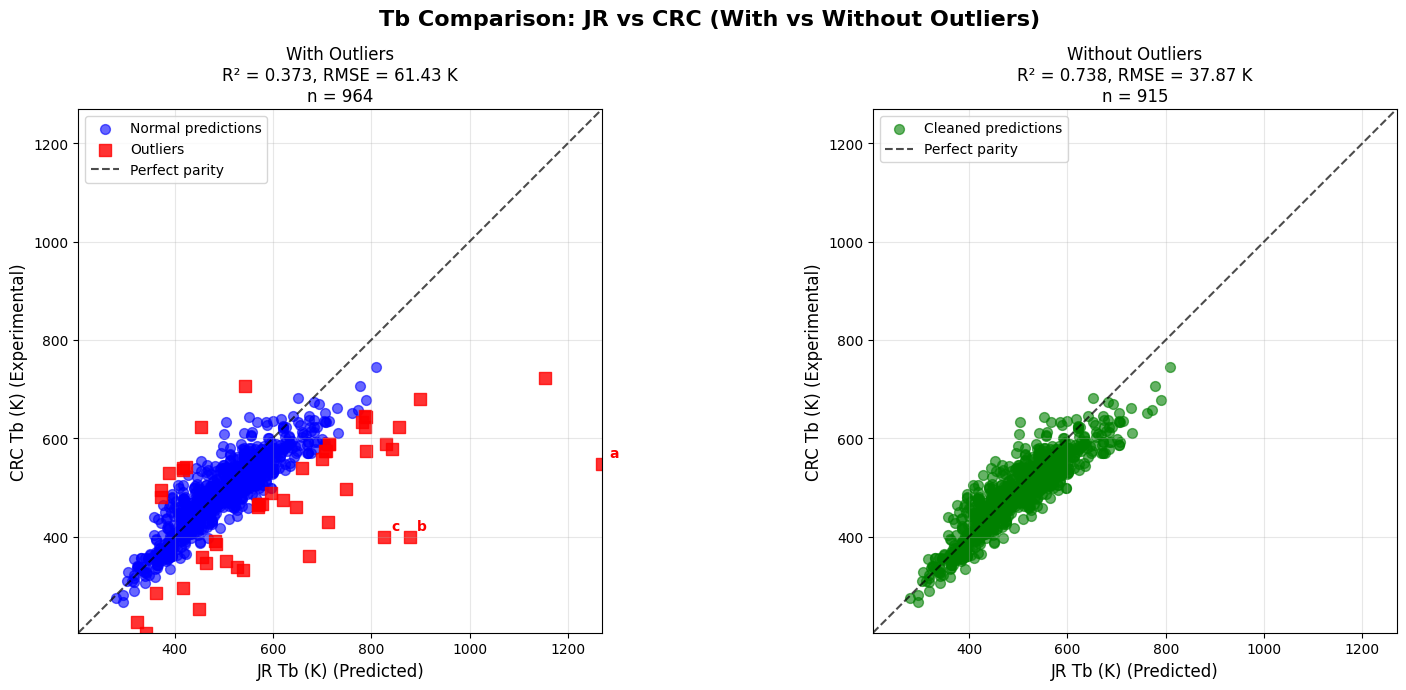


Statistical Comparison for Tb:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              0.3728               0.7381               +98.0%         
MAE             36.6518              28.7904              +21.4%         
RMSE            61.4252              37.8739              +38.3%         
MAPE            7.5392               5.8062               +23.0%         

Data points removed: 49 (5.1%)

Top 3 Outliers for Tb (>21.4% error):
a: CAS 81-33-4
   JR: 1269.68 K, CRC: 547.15 K, Error: 132.1%
   SMILES: C1=CC2=C3C(=CC=C4C3=C1C5=C6C4=CC=C7C6=C(C=C5)C(=O)NC7=O)C(=O...

b: CAS 55285-14-8
   JR: 879.65 K, CRC: 399.15 K, Error: 120.4%
   SMILES: CCCCN(CCCC)SN(C)C(=O)OC1=CC=CC2=C1OC(C2)(C)C...

c: CAS 509-14-8
   JR: 826.61 K, CRC: 398.75 K, Error: 107.3%
   SMILES: C([N+](=O)[O-])([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]...



In [ ]:
# For boiling point:
runPropertyAnalysis(modified_Tb_CRC_dF, "Boiling Point Analysis")

### Melting Point Comparison [JR-predictions vs Experimental (CRC handbook)]

Property Analysis: Melting Point Analysis
DataFrame shape: (1932, 5)
Valid predicted data: 1932
Valid experimental data: 1932
Valid pairs: 1932

Analyzing: Tm (K)
Predicted: JR Tm /K
Experimental: CRC Tm /K
--------------------------------------------------


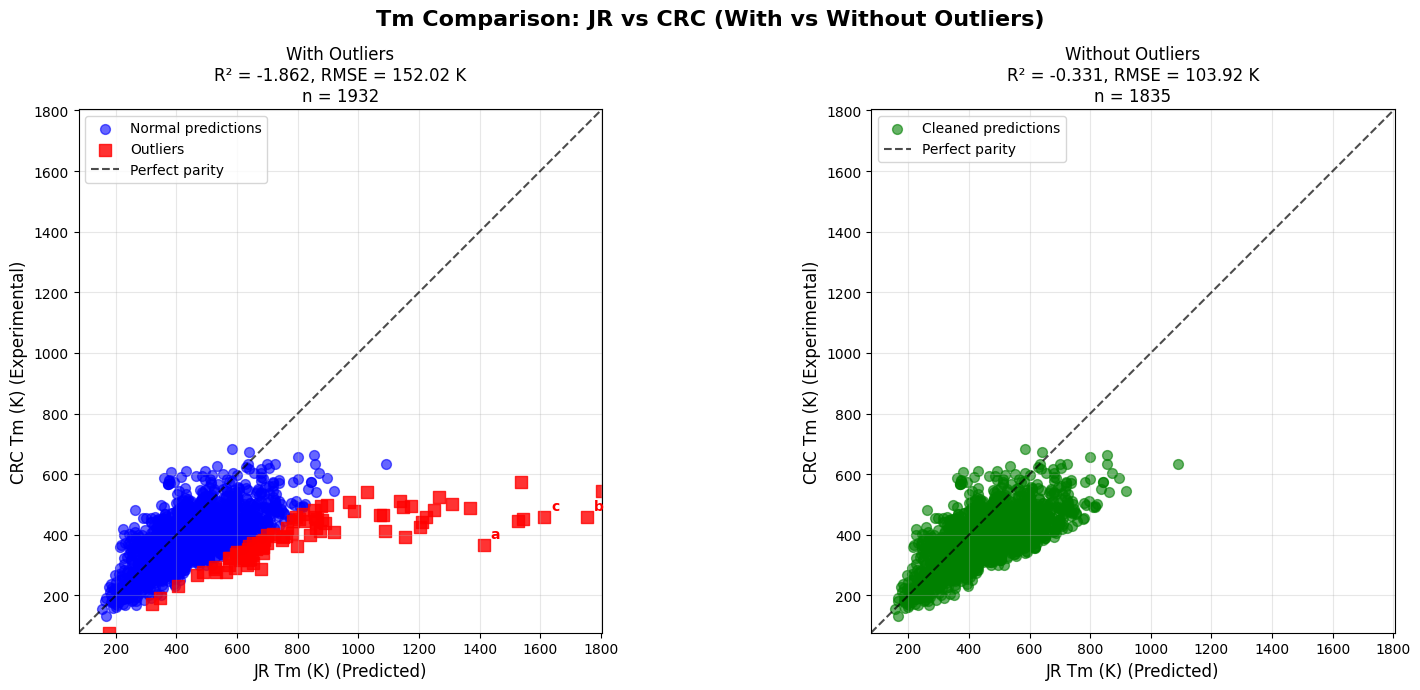


Statistical Comparison for Tm:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              -1.8624              -0.3308              -82.2%         
MAE             96.6820              78.5767              +18.7%         
RMSE            152.0150             103.9210             +31.6%         
MAPE            25.2821              20.7952              +17.7%         

Data points removed: 97 (5.0%)

Top 3 Outliers for Tm (>73.1% error):
a: CAS 643-22-1
   JR: 1413.54 K, CRC: 365.15 K, Error: 287.1%
   SMILES: CCCCCCCCCCCCCCCCCC(=O)O.CCC1C(C(C(C(=O)C(CC(C(C(C(C(C(=O)O1)...

b: CAS 2001-95-8
   JR: 1754.20 K, CRC: 460.15 K, Error: 281.2%
   SMILES: CC1C(=O)NC(C(=O)OC(C(=O)NC(C(=O)OC(C(=O)NC(C(=O)OC(C(=O)NC(C...

c: CAS 2411-89-4
   JR: 1614.25 K, CRC: 459.15 K, Error: 251.6%
   SMILES: CC1=CC(=CC(=C1O)CN(CC(=O)O)CC(=O)O)C2(C3=CC=CC=C3C(=O)O2)C4=...



In [ ]:
# For melting point (assuming you have a similar dataframe):
runPropertyAnalysis(modified_Tm_CRC_dF, "Melting Point Analysis")

### Critical Pressure Comparison [JR-predictions vs Experimental (CRC handbook)]

Property Analysis: Critical Pressure Analysis
DataFrame shape: (73, 5)
Valid predicted data: 73
Valid experimental data: 73
Valid pairs: 73

Analyzing: Pc (Bars)
Predicted: JR Pc /Bars
Experimental: CRC Pc /Bars
--------------------------------------------------


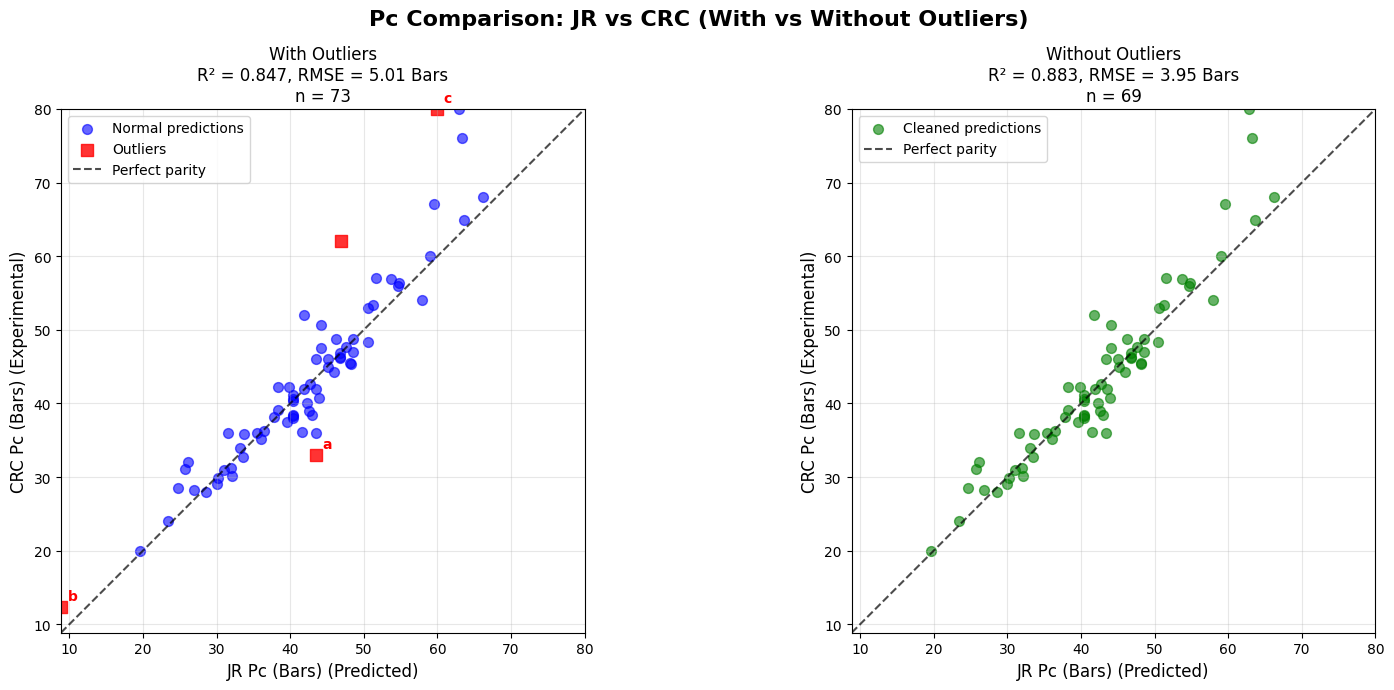


Statistical Comparison for Pc:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              0.8473               0.8834               +4.3%          
MAE             3.0989               2.5659               +17.2%         
RMSE            5.0063               3.9497               +21.1%         
MAPE            6.8363               5.6434               +17.4%         

Data points removed: 4 (5.5%)

Top 3 Outliers for Pc (>22.6% error):
a: CAS 106-49-0
   JR: 43.45 Bars, CRC: 33.00 Bars, Error: 31.7%
   SMILES: CC1=CC=C(C=C1)N...

b: CAS 311-89-7
   JR: 8.86 Bars, CRC: 12.40 Bars, Error: 28.5%
   SMILES: C(C(C(F)(F)F)(F)F)(C(N(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)C(C(C(C...

c: CAS 109-97-7
   JR: 59.91 Bars, CRC: 80.00 Bars, Error: 25.1%
   SMILES: C1=CNC=C1...



In [ ]:
runPropertyAnalysis(modified_Pc_CRC_dF, "Critical Pressure Analysis")

### Critical Volume Comparison [JR-predictions vs Experimental (CRC handbook)]

Property Analysis: Critical Volume Analysis
DataFrame shape: (69, 5)
Valid predicted data: 69
Valid experimental data: 69
Valid pairs: 69

Analyzing: Vc ((cm3)
Predicted: JR Vc /(cm3 mol-1)
Experimental: CRC Vc /(cm3 mol-1)
--------------------------------------------------


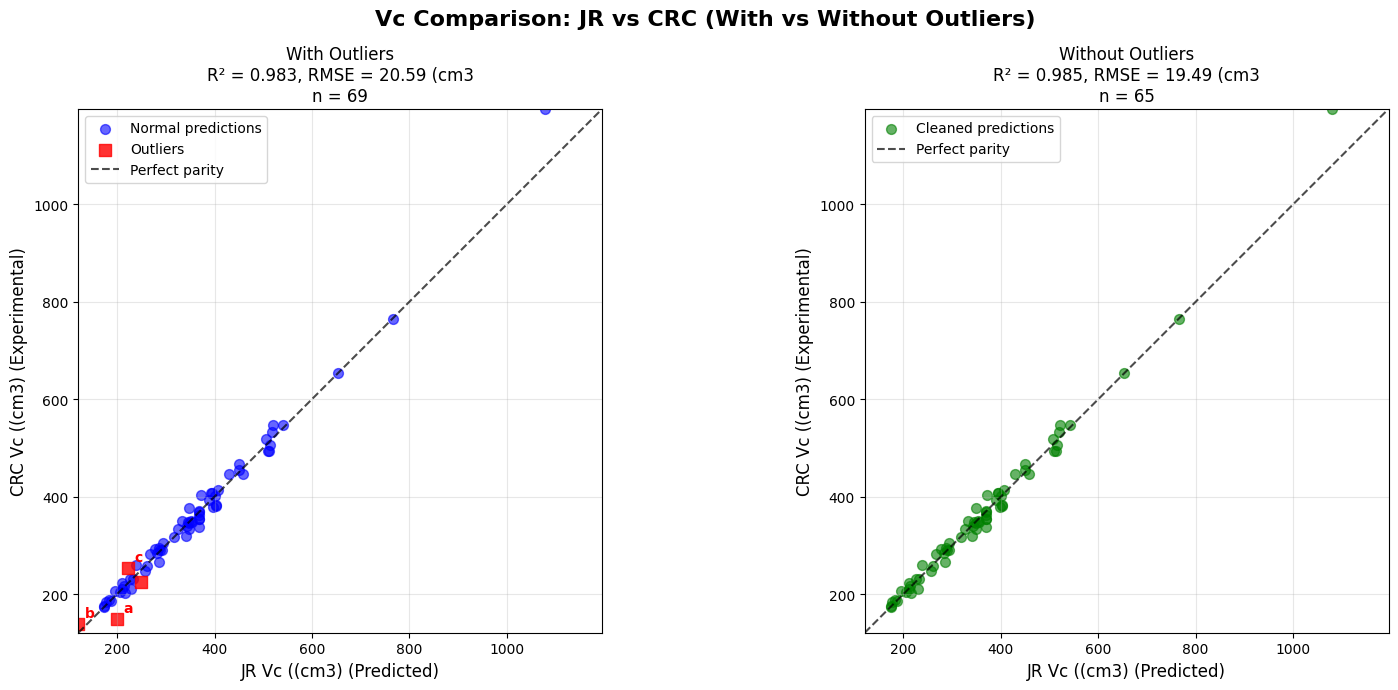


Statistical Comparison for Vc:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              0.9831               0.9847               +0.2%          
MAE             12.9783              11.8385              +8.8%          
RMSE            20.5861              19.4905              +5.3%          
MAPE            4.0036               3.1594               +21.1%         

Data points removed: 4 (5.8%)

Top 3 Outliers for Vc (>10.4% error):
a: CAS 460-19-5
   JR: 199.50 (cm3, CRC: 149.00 (cm3, Error: 33.9%
   SMILES: C(#N)C#N...

b: CAS 74-89-5
   JR: 120.50 (cm3, CRC: 139.00 (cm3, Error: 13.3%
   SMILES: CN...

c: CAS 75-50-3
   JR: 221.50 (cm3, CRC: 254.00 (cm3, Error: 12.8%
   SMILES: CN(C)C...



In [ ]:
runPropertyAnalysis(modified_Vc_CRC_dF, "Critical Volume Analysis")

### Critical Temparature Comparison [JR-predictions vs Experimental (CRC handbook)]

Property Analysis: Critical Temperature Analysis
DataFrame shape: (73, 5)
Valid predicted data: 73
Valid experimental data: 73
Valid pairs: 73

Analyzing: Tc (K)
Predicted: JR Tc /K
Experimental: CRC Tc /K
--------------------------------------------------


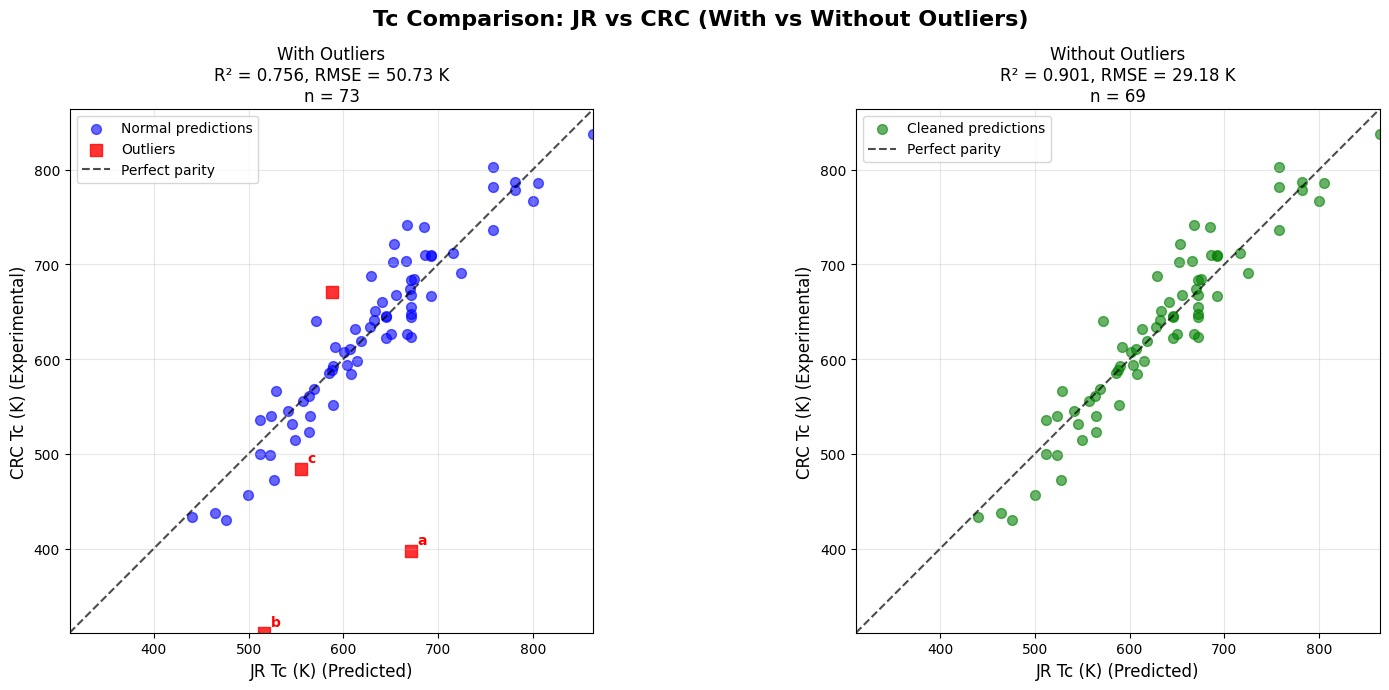


Statistical Comparison for Tc:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              0.7557               0.9013               +19.3%         
MAE             30.0896              22.6579              +24.7%         
RMSE            50.7307              29.1821              +42.5%         
MAPE            5.6845               3.6656               +35.5%         

Data points removed: 4 (5.5%)

Top 3 Outliers for Tc (>11.9% error):
a: CAS 460-19-5
   JR: 671.04 K, CRC: 397.00 K, Error: 69.0%
   SMILES: C(#N)C#N...

b: CAS 353-85-5
   JR: 516.31 K, CRC: 311.10 K, Error: 66.0%
   SMILES: C(#N)C(F)(F)F...

c: CAS 75-64-9
   JR: 555.04 K, CRC: 483.70 K, Error: 14.7%
   SMILES: CC(C)(C)N...



In [ ]:
runPropertyAnalysis(modified_Tc_CRC_dF, "Critical Temperature Analysis")

### Enthalpy of Vaporisation [JR-predictions vs Experimental (CRC handbook)]


Property Analysis: Enthalpy of Vaporisation Analysis
DataFrame shape: (75, 5)
Valid predicted data: 75
Valid experimental data: 75
Valid pairs: 75

Analyzing: Hvap ((kJ)
Predicted: JR Hvap /(kJ mol-1)
Experimental: CRC Hvap /(kJ mol-1)
--------------------------------------------------


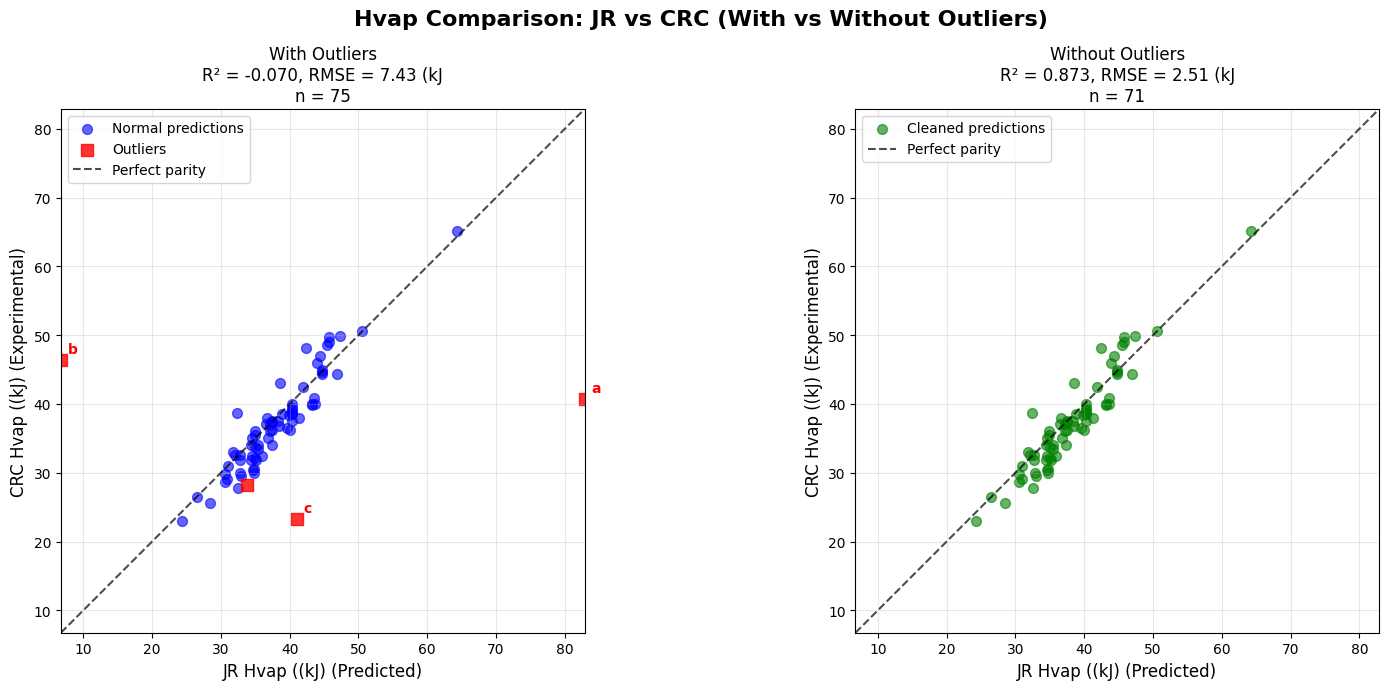


Statistical Comparison for Hvap:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              -0.0697              0.8725               -1351.5%       
MAE             3.2974               2.0035               +39.2%         
RMSE            7.4289               2.5072               +66.3%         
MAPE            9.0695               5.5748               +38.5%         

Data points removed: 4 (5.3%)

Top 3 Outliers for Hvap (>17.7% error):
a: CAS 509-14-8
   JR: 82.89 (kJ, CRC: 40.74 (kJ, Error: 103.5%
   SMILES: C([N+](=O)[O-])([N+](=O)[O-])([N+](=O)[O-])[N+](=O)[O-]...

b: CAS 311-89-7
   JR: 6.74 (kJ, CRC: 46.40 (kJ, Error: 85.5%
   SMILES: C(C(C(F)(F)F)(F)F)(C(N(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)C(C(C(C...

c: CAS 460-19-5
   JR: 41.00 (kJ, CRC: 23.33 (kJ, Error: 75.7%
   SMILES: C(#N)C#N...



In [ ]:
runPropertyAnalysis(modified_Hvap_CRC_dF, "Enthalpy of Vaporisation Analysis")

### logP [JR-predictions vs Experimental (CRC handbook)]

1.   List item
2.   List item



Property Analysis: logP Analysis
DataFrame shape: (3463, 5)
Valid predicted data: 3463
Valid experimental data: 3463
Valid pairs: 3463

Analyzing: P
Predicted: Log P (JR)
Experimental: logP (CRC)
--------------------------------------------------


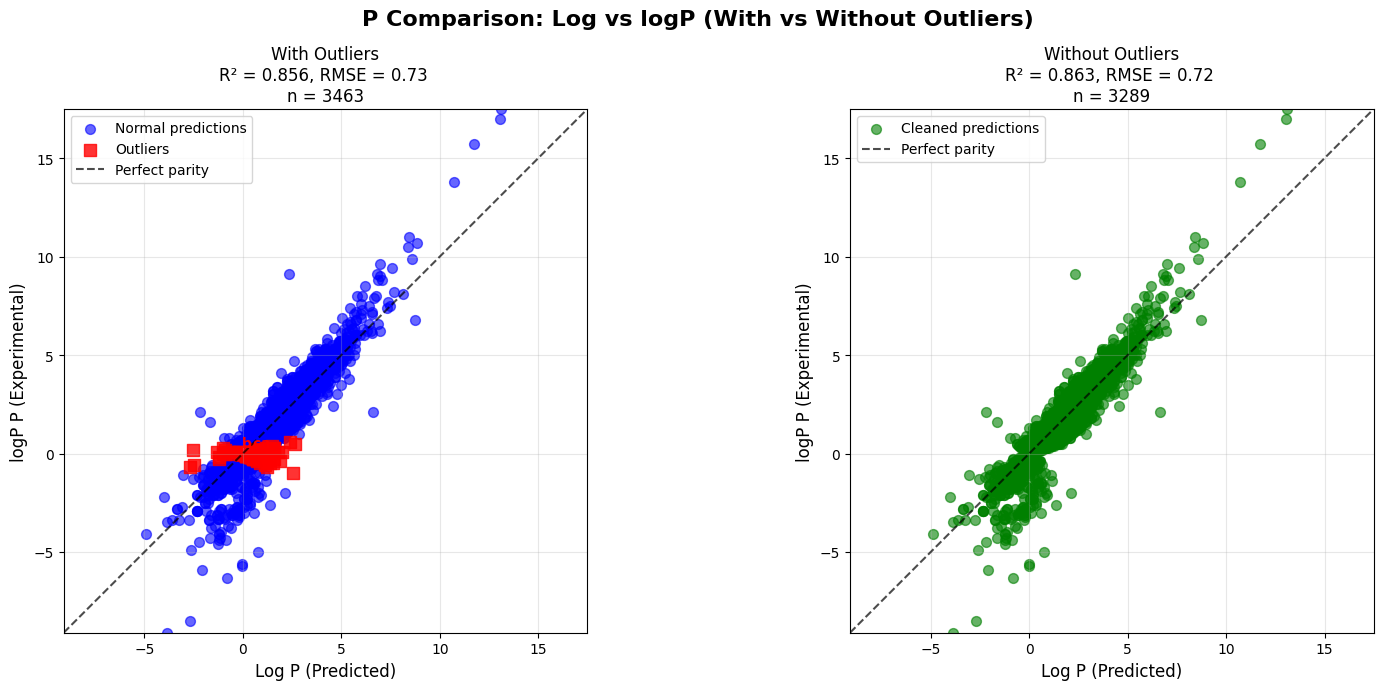


Statistical Comparison for P:
Metric          With Outliers        Without Outliers     Improvement    
--------------------------------------------------------------------------------
R2              0.8563               0.8629               +0.8%          
MAE             0.4629               0.4482               +3.2%          
RMSE            0.7310               0.7204               +1.5%          
MAPE            inf                  33.0935              +nan%          

Data points removed: 174 (5.0%)

Top 3 Outliers for P (>242.2% error):


/tmp/ipython-input-3525715538.py:206: RuntimeWarning: invalid value encountered in scalar divide
  improvement = f"{((with_val - without_val) / with_val * 100):+.1f}%"


ZeroDivisionError: float division by zero

In [ ]:
runPropertyAnalysis(modified_logP_CRC_dF, "logP Analysis")